In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_FashionMNIST

Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\IAML-CW2\\data")

Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

Xmean = Xtrn.mean(0)

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

Wall time: 1.74 s


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
# %%time

# lgr_model = LogisticRegression()
# lgr_model.fit(Xtrn_nm, Ytrn)

In [4]:
# %%time

# lgr_pred = lgr_model.predict(Xtst_nm)
# lgr_cm = confusion_matrix(Ytst, lgr_pred)

# lgr_acc = np.trace(lgr_cm) / Ytst.shape[0]

In [5]:
# %%time

# svc_model = SVC()
# svc_model.fit(Xtrn_nm, Ytrn)

In [6]:
# %%time

# svc_pred = svc_model.predict(Xtst_nm)
# svc_cm = confusion_matrix(Ytst, svc_pred)

# svc_acc = np.trace(svc_cm) / Ytst.shape[0]

In [7]:
# lgr_cm, lgr_acc, svc_cm, svc_acc

In [8]:
small_indices = np.array([])
for c in range(10):
    class_indices = np.where(Ytrn == c)[0][:1000]
    small_indices = np.append(small_indices, class_indices).astype("int32")

In [9]:
Xsmall = Xtrn_nm[small_indices]
Ysmall = Ytrn[small_indices]

In [10]:
Xsmall.shape, Ysmall.shape

((10000, 784), (10000,))

In [11]:
from sklearn.model_selection import KFold

cvals = np.logspace(-2, 3, 10)
cvals

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

In [12]:
%%time

kfold = KFold(3, True, 1)
cmeans = []


for c in cvals:
    acc_sum = 0
    for train, test in kfold.split(Xsmall, Ysmall):
        model = SVC(C = c, kernel = "rbf", gamma = "auto")
        model.fit(Xsmall[train], Ysmall[train])
        acc_sum += model.score(Xsmall[test], Ysmall[test])
    cmeans.append(acc_sum/3)

Wall time: 19min 2s


Text(0,0.5,'Mean Classification Accuracy')

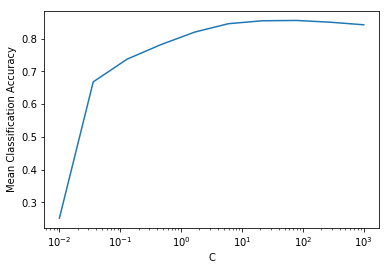

In [13]:
plt.plot(cvals, cmeans)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Mean Classification Accuracy")

In [16]:
maxC_index = np.argmax(cmeans)
maxC_value = cvals[maxC_index]
cmeans[maxC_index], maxC_value

(0.8559008270353129, 77.42636826811278)

In [17]:
optimal_model = SVC(C = maxC_value)
model.fit(Xtrn_nm, Ytrn)
print(model.score(Xtrn_nm, Ytrn))
print(model.score(Xtst_nm, Ytst))

0.9831
0.8845
